In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hdfs_path = 'hdfs_output_path = "hdfs://127.0.0.1:9000/output"'

### Finding Missing Values


To ensure the quality of our data analysis and machine learning processes, it is crucial to address missing and null values appropriately. In order to assess the effectiveness of our data parsing and extraction logic, we need to verify the presence of any null rows in the original dataframe. This step will allow us to determine if there are any incomplete or missing entries that may impact the accuracy and reliability of our analyses. By confirming the absence of null rows, we can proceed with confidence knowing that our data is complete and ready for further analysis.

In [2]:
missing_values_df = pd.read_parquet(os.path.join(hdfs_path, "missing_values"))
missing_values_df.sum()

current_time    0
host            0
time            0
method          0
endpoint        0
protocol        0
status          0
content_size    0
dtype: int64

### Content Size Statistics

In [3]:
content_size_summary_df = pd.read_parquet(os.path.join(hdfs_path, "content_size_summary"))
content_size_summary_df

,min_content_size,max_content_size,mean_content_size,std_content_size,count_content_size
0,1,59999,30062.938396,17341.870904,26167
1,3,59998,30048.186446,17361.875635,23964
2,2,59997,29985.197175,17327.696858,22021
3,1,59998,30106.410871,17294.502581,25351
4,3,59989,30168.883170,17324.149305,24035
...,...,...,...,...,...
690,7,59997,30133.554620,17394.090562,24002
691,5,59998,29970.745137,17302.115699,23852
692,5,59999,30134.839400,17274.613595,25193
693,2,59999,29959.359595,17268.612015,25665


### HTTP Status Code Analysis


In [4]:
http_status_df = pd.read_parquet(os.path.join(hdfs_path, "http_status"))
http_status_df.groupby('status').sum().sort_values(by="count", ascending=False)

,count
status,
200,2922328
404,2921990
303,2921130
403,2918559
502,2917205
500,2916434
304,2915832


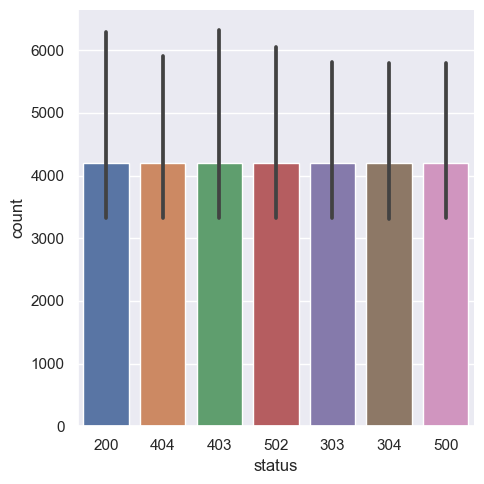

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

status_freq_df = http_status_df.sort_values(by=['count'], ascending=False)
status_freq_df['status'] = status_freq_df['status'].astype(str)
status_freq_df['count'] = status_freq_df['count'].astype(int)

sns.catplot(x='status', y='count', data=status_freq_df, kind='bar')

plt.show()

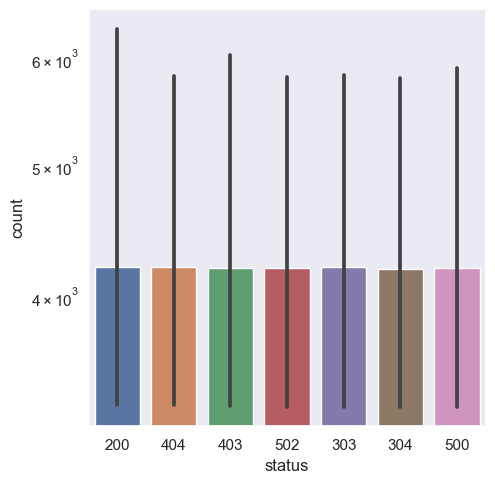

In [6]:
#Since the y-axis labels are not readable, I want to adjust the y-axis labels to be more readable -> using log scale
status_freq_df = http_status_df.sort_values(by=['count'], ascending=False)
status_freq_df['status'] = status_freq_df['status'].astype(str)
status_freq_df['count'] = status_freq_df['count'].astype(int)

sns.catplot(x='status', y='count', data=status_freq_df, kind='bar')

plt.yscale('log')
plt.show()

### Analyzing Frequent Hosts

In [7]:
frequent_hosts_df = pd.read_parquet(os.path.join(hdfs_path, "frequent_hosts"))
frequent_hosts_df.groupby('host').sum().sort_values(by="count", ascending=False).head()

,count
host,
138.10.36.17,4
15.165.144.237,4
29.67.7.242,4
97.207.33.80,4
162.94.217.230,4


### Display the Top 20 Frequent EndPoints


In [8]:
frequent_endPoints_df = pd.read_parquet(os.path.join(hdfs_path, "frequent_endPoints"))
frequent_endPoints_df.groupby('endpoint').sum().sort_values(by="count", ascending=False).head(20)

,count
endpoint,
/Archives/edgar/data/0001326380/000132638023000019/gme-20230128.htm,46535
/Archives/edgar/data/0001056673/000094930398000131/0000949303-98-000131.txt,45703
/Archives/edgar/data/0001866295/000110465921080403/tm2117388d5_ex3-32g008.jpg,45397
/Archives/edgar/data/0001763499/000121390021017164/s131140_10k.htm,43591
/Archives/edgar/data/0001867102/000110465922086725/,43137
/Archives/edgar/data/0000205007/000114554923005577/0001145549-23-005577.txt,42988
/Archives/edgar/data/0001260125/000114420419015071/tv516461_10k.htm,42817
/Archives/edgar/data/0001179929/000117992923000043/moh-20230320_g29.jpg,42477
/Archives/edgar/data/0000352825/000035282519000012/0000352825-19-000012.txt,42430


### Top Ten Error Endpoints


In [9]:
error_endpoints_df = pd.read_parquet(os.path.join(hdfs_path, "error_endpoints"))
error_endpoints_df.groupby('endpoint').sum().sort_values(by="count", ascending=False).head(10)

,count
endpoint,
/Archives/edgar/data/0001056673/000094930398000131/0000949303-98-000131.txt,33172
/Archives/edgar/data/0001468457/000093247112005362/0000932471-12-005362.txt,30404
/Archives/edgar/data/0001260125/000114420419015093/tv516458_10k.htm,29352
/Archives/edgar/data/0000205007/000114554923005577/0001145549-23-005577.txt,29016
/Archives/edgar/data/0000352825/000035282519000012/0000352825-19-000012.txt,28871
/Archives/edgar/data/1932485/000110465923037622/tm239175d10_absee.htm,28021
/Archives/edgar/data/0000352825/000035282519000012/fstr-20181231.htm,27924
/Archives/edgar/data/0001179929/000117992923000043/moh-20230320_g29.jpg,27805
/Archives/edgar/data/0001179929/000117992923000043/moh-20230320_g27.jpg,27527


### Total number of Unique Hosts


In [10]:
unique_hosts_df = pd.read_parquet(os.path.join(hdfs_path, "unique_hosts"))
unique_hosts_df.count()

host    20426966
dtype: int64

### Number of Unique Daily Hosts

In [11]:
unique_daily_hosts_df = pd.read_parquet(os.path.join(hdfs_path, "unique_daily_hosts"))
unique_daily_hosts_df.groupby('day').sum().sort_index(ascending=True)

,count
day,
1,672033
2,670255
3,671117
4,669375
5,671442
6,672620
7,671773
8,670534
9,669900


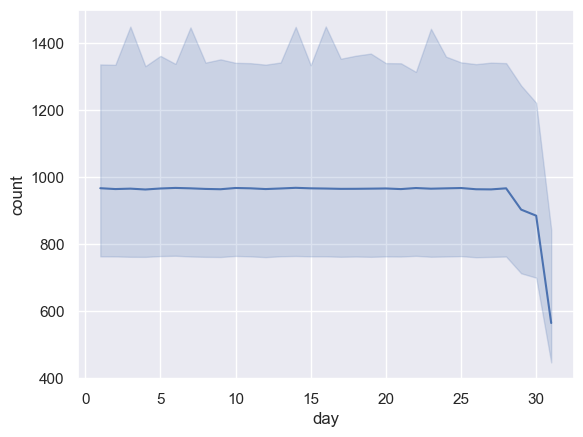

In [12]:
c = sns.lineplot(x='day', y='count', data=unique_daily_hosts_df)

### Average Number of Daily Requests per Host


In [13]:
avg_daily_requests_per_host_df = pd.read_parquet(os.path.join(hdfs_path, "avg_daily_reqests_per_host"))
total_df = avg_daily_requests_per_host_df.groupby('day').sum()[['total_reqs', 'total_hosts']]
total_df['avg_reqs'] = total_df['total_reqs'] / total_df['total_hosts']
total_df

,total_reqs,total_hosts,avg_reqs
day,,,
1,672178,672033,1.000216
2,670405,670255,1.000224
3,671268,671117,1.000225
4,669524,669375,1.000223
5,671603,671442,1.000240
6,672807,672620,1.000278
7,671939,671773,1.000247
8,670691,670534,1.000234
9,670028,669900,1.000191


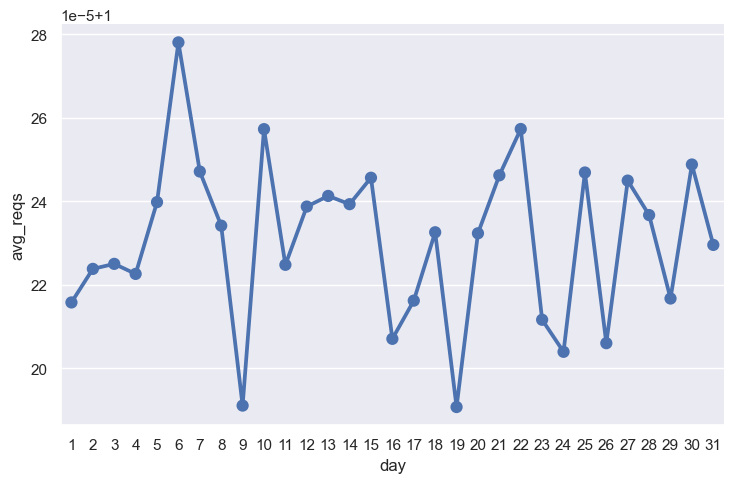

In [14]:
c = sns.catplot(x='day', y='avg_reqs', 
                data=total_df.reset_index(), 
                kind='point', height=5, aspect=1.5)

### Listing the Top Twenty 404 Response Code Endpoints


In [15]:
endpoints_404_count_df = pd.read_parquet(os.path.join(hdfs_path, "endpoints_404_count"))
endpoints_404_count_df.groupby('endpoint').sum().sort_values('count', ascending=False).head(20)

,count
endpoint,
/Archives/edgar/data/0001795772/000121390021017160/s131128_10k.htm,19948
/Archives/edgar/data/921112/000089542110000396/0000895421-10-000396.txt,19867
/Archives/edgar/data/0001729361/000121390021017176/s131100_10k.htm,19860
/Archives/edgar/data/19411/0001104659-12-037849.txt,19823
/Archives/edgar/data/0001704304/000092963819000386/0000929638-19-000386.txt,19809
/Archives/edgar/data/0001675033/000156459021054728/gecc-10q_20210930.htm,19808
/Archives/edgar/data/0001260125/000114420419015062/0001144204-19-015062.txt,19803
/Archives/edgar/data/0001056673/000094930398000131/0000949303-98-000131.txt,19773
/Archives/edgar/data/0001608293/000119312514225607/g732497g91g62.jpg,19757


### Listing the Top Twenty 404 Response Code Hosts


In [16]:
hosts_404_count_df = pd.read_parquet(os.path.join(hdfs_path, "hosts_404_count_df"))
hosts_404_count_df.groupby('host').sum().sort_values(by=['count'], ascending=False).head(20)

,count
host,
186.179.233.79,4
214.82.133.193,4
164.41.2.88,4
163.29.91.181,4
190.199.230.106,4
65.67.243.6,4
16.203.51.110,4
29.120.53.241,4
45.172.59.13,4


### Visualizing 404 Errors per Day


In [17]:
errors_by_date_sorted_df = pd.read_parquet(os.path.join(hdfs_path, "errors_by_date_sorted"))
errors_by_date_sorted_df.groupby('day').sum().sort_index(ascending=True)

,count
day,
1,95976
2,95873
3,96109
4,95200
5,96540
6,96213
7,96339
8,95863
9,96017


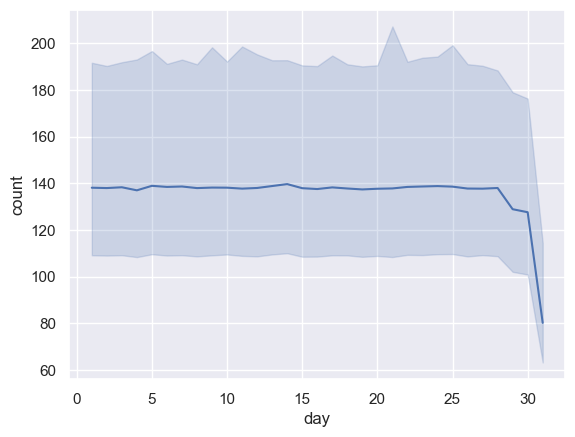

In [18]:
c = sns.lineplot(x='day', y='count', 
                data=errors_by_date_sorted_df)

### Visualizing Hourly 404 Errors

In [19]:
hourly_avg_errors_sorted_df = pd.read_parquet(os.path.join(hdfs_path, "hourly_avg_errors_sorted"))
hourly_avg_errors_sorted_df.groupby('hour').sum().sort_index(ascending=True)

,count
hour,
0,121759
1,122691
2,120879
3,122504
4,121716
5,121806
6,121362
7,121752
8,122031


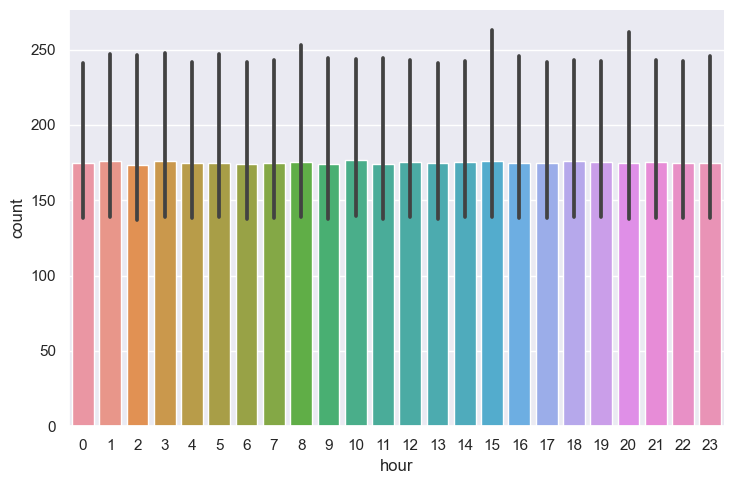

In [20]:
c = sns.catplot(x='hour', y='count', 
                data=hourly_avg_errors_sorted_df, 
                kind='bar', height=5, aspect=1.5)